In [1]:
import pandas as pd
import numpy as np
import os
import networkx as nx

In [2]:
from collections import defaultdict

In [3]:
from matplotlib import pyplot as plt

In [4]:
G=nx.Graph()


In [5]:
voc2=pd.read_csv('../Data2/data_voc2.csv')


In [6]:
user=pd.read_csv('../Data2/data_user.csv')

In [12]:
# test
len(list(set(user['phone_no_m'])))

5677

In [7]:
edge_list=list()
for i,j in zip(voc2['phone_no_m'],voc2['opposite_no_m']):
    edge_list.append((i,j))

In [8]:
G.add_nodes_from(user['user'])

In [9]:
G.add_edges_from(edge_list)

In [4]:
G=nx.read_adjlist('../Data2/graph.adjlist')

In [11]:
#test
len(G.nodes)

1263999

In [12]:
list_user=list(set(user['user']))

In [13]:
len(list_user)

5677

In [14]:
# test
set(user['user'])-set(voc2['phone_no_m'])

{668792}

In [15]:
friend_dict=dict()


In [16]:
common_fraud_graph=nx.Graph()

In [17]:
for i,label in zip(list(user['user']),list(user['label'])):
    if label==0:continue
    friend_dict[i]=set(G.adj[i])

In [18]:
normal_user=user.loc[user['label']==0]

In [19]:
normal_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3925 entries, 0 to 5675
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   user         3925 non-null   int64  
 1   phone_no_m   3925 non-null   object 
 2   idcard_cnt   3925 non-null   int64  
 3   arpu_201908  3925 non-null   float64
 4   arpu_201909  3925 non-null   float64
 5   arpu_201910  3925 non-null   float64
 6   arpu_201911  3925 non-null   float64
 7   arpu_201912  3925 non-null   float64
 8   arpu_202001  3925 non-null   float64
 9   arpu_202002  3925 non-null   float64
 10  arpu_202003  3925 non-null   float64
 11  label        3925 non-null   int64  
dtypes: float64(8), int64(3), object(1)
memory usage: 398.6+ KB


In [15]:
normal_user_set=set(normal_user['user'])

In [16]:
fraud_user_set=set(user.loc[user['label']==1]['user'])

In [30]:
common_fraud_graph.add_nodes_from(fraud_user_set)

In [17]:
for k,v in friend_dict.items():
    v=v-fraud_user_set
    friend_dict[k]=v

In [21]:
common_fraud_receiver=defaultdict(set)

In [19]:
frauds=list(fraud_user_set)

In [43]:
for i in range(len(frauds)-1):
    for j in range(i+1,len(frauds)):
        v1=frauds[i]
        v2=frauds[j]
        if len(friend_dict[v1]&friend_dict[v2])>0:
            common_fraud_graph.add_edge(v1,v2)

In [22]:
for i in range(len(frauds)):
    for j in range(len(frauds)):
        if i==j:continue
        v1=frauds[i]
        v2=frauds[j]
        receiver1=friend_dict[v1]
        receiver2=friend_dict[v2]
        comm_fraud=receiver1&receiver2
        common_fraud_receiver[v1]=common_fraud_receiver[v1]|comm_fraud

In [25]:
common_fraud_count=list()

In [26]:
for k,v in common_fraud_receiver.items():
    common_fraud_count.append(len(v))

In [28]:
common_fraud_count[:10]

[4, 12, 16, 30, 3, 18, 53, 0, 1, 1]

In [29]:
len(common_fraud_count)

1752

In [32]:
counts=defaultdict(int)
for i in common_fraud_count:
    counts[i]+=1

In [34]:
max_common=np.max(common_fraud_count)

In [35]:
max_common

563

In [38]:
counts_values=list()

In [39]:
for i in range(max_common+1):
    if i in counts:
        counts_values.append(counts[i])
    else:
        counts_values.append(0)

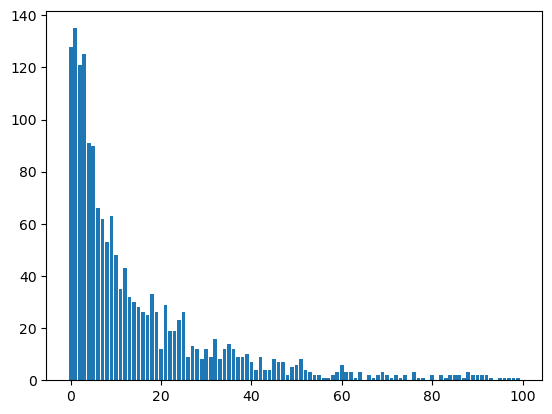

In [42]:
plt.bar(range(len(counts_values[:100])),counts_values[:100])
plt.show()

In [49]:
nx.write_adjlist(common_fraud_graph,'../Data2/common_fraud_graph.adjlist')

In [ ]:
nx.write_adjlist(G,'../Data2/graph.adjlist')

AttributeError: module 'scipy.sparse' has no attribute 'coo_array'

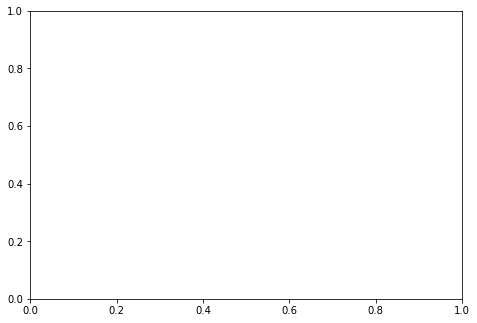

In [48]:
nx.draw(common_fraud_graph)